In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios.iloc[:, [0,1,2,5]]

,latitude,longitude,brightness,acq_date
0,37.0886,-5.8802,300.4,2021-01-02
1,36.6599,-4.8777,305.5,2021-01-02
2,36.8729,-2.4486,304.8,2021-01-02
3,36.8745,-2.4347,334.7,2021-01-02
4,40.2352,-0.8699,320.1,2021-01-04
...,...,...,...,...
4720,43.1755,-5.4329,309.2,2021-12-31
4721,43.2442,-3.7813,316.1,2021-12-31
4722,43.1631,-5.5095,303.0,2021-12-31
4723,43.2663,-4.4370,303.2,2021-12-31


In [7]:
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetEstaciones.iloc[:,[2,4,5,6]]

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [24]:
from geopy.geocoders import Nominatim
datasetClima = pd.read_excel('./ClimaAemet2021/Aemet2021-01/Aemet2021-01-01.xls')
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetEstaciones.iloc[:,[2,4,5,6]]
datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))

for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                if datasetEstaciones.iloc[y,5][-1] == 'W':
                    datasetClima.iloc[x,-2] = int(datasetEstaciones.iloc[y,4][:2])+int(datasetEstaciones.iloc[y,4][2:4])/60 + int(datasetEstaciones.iloc[y,4][4:6])/3600
                    datasetClima.iloc[x,-1] = (int(datasetEstaciones.iloc[y,5][:2])+int(datasetEstaciones.iloc[y,5][2:4])/60 + int(datasetEstaciones.iloc[y,5][4:6])/3600)*-1
                else:
                    datasetClima.iloc[x,-2] = int(datasetEstaciones.iloc[y,4][:2])+int(datasetEstaciones.iloc[y,4][2:4])/60 + int(datasetEstaciones.iloc[y,4][4:6])/3600
                    datasetClima.iloc[x,-1] = (int(datasetEstaciones.iloc[y,5][:2])+int(datasetEstaciones.iloc[y,5][2:4])/60 + int(datasetEstaciones.iloc[y,5][4:6])/3600)
                break
            else:
                try:
                    geolocator = Nominatim(user_agent="zaragoza") 
                    print(datasetClima.iloc[x,0])
                    location = geolocator.geocode(datasetClima.iloc[x,0])
                    print(location.latitude, location.longitude)
                    datasetClima.iloc[x,-2] = location.latitude
                    datasetClima.iloc[x,-1] = location.longitude
                except:
                    datasetClima.iloc[x,-2] = None
                    datasetClima.iloc[x,-1] = None
                finally:
                    break

datasetClima

Estaca de Bares
43.7903123 -7.6882854
Ferrol
43.4846862 -8.233162
As Pontes
43.4502183 -7.853109
A Coruña Aeropuerto
43.300259499999996 -8.379608542189715
Carballo, Depuradora
Cabo Vilan
43.3719352 -8.3998284
Vimianzo
43.1102989 -9.0327488
Fisterra
Mazaricos
42.9364002 -8.9904506
Sobrado
43.0404996 -8.02238
Santiago de Compostela Aeropuerto
42.89764215 -8.41891330714926
Noia
42.7850763 -8.8877375
Monte Iroite
Boiro
42.6462941 -8.8858718
Padrón
42.7510147 -8.6292056
Santiago de Compostela
42.8804219 -8.5458608
Rois, Casas do Porto
Ossa de Montiel
38.9625266 -2.7453748
Villarrobledo
Munera
39.0417625 -2.4800931
Yeste, Embalse Fuensanta
38.376718600000004 -2.233079815498649
Yeste
38.3669265 -2.3190394
Hellín
38.5106649 -1.6995137
Albacete Base Aérea
38.9472217 -1.8614864538414657
Chinchilla
-26.750100500000002 150.6228555674773
Albacete
38.9950921 -1.8559154
Alcalá del Júcar
39.1928901 -1.4289945
Almansa
38.8682065 -1.0978627
Orihuela
38.0856891 -0.9448805
Pinoso
38.4021056 -1.041617
Roja

In [19]:
datasetClima = pd.read_excel('./ClimaAemet2021/Aemet2021-01/Aemet2021-01-01.xls')
datasetClima

from geopy.geocoders import Nominatim 
#geolocator = Nominatim(user_agent="zaragoza") 
#location = geolocator.geocode("Estaca de Bares") 
#print(location.latitude, location.longitude) 
for x in range(len(datasetClima)):
    if(x >= 4):
        geolocator = Nominatim(user_agent="zaragoza") 
        print(datasetClima.iloc[x,0])
        location = geolocator.geocode(datasetClima.iloc[x,0])
        print(location.latitude, location.longitude)


Estaca de Bares
43.7903123 -7.6882854
Ferrol
43.4846862 -8.233162
As Pontes
43.4502183 -7.853109
A Coruña
43.3709703 -8.3959425
A Coruña Aeropuerto
43.300259499999996 -8.379608542189715
Carballo, Depuradora


In [23]:
datasetClima = datasetClima.dropna()

datasetClima.to_csv('./prueba.csv')

In [23]:
import pandas as pd
import numpy as np

datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
if datasetEstaciones.iloc[53,5][-1] == 'W':
    a = int(datasetEstaciones.iloc[53,4][:2])+int(datasetEstaciones.iloc[53,4][2:4])/60 + int(datasetEstaciones.iloc[53,4][4:6])/3600
    b = (int(datasetEstaciones.iloc[53,5][:2])+int(datasetEstaciones.iloc[53,5][2:4])/60 + int(datasetEstaciones.iloc[53,5][4:6])/3600)*-1
else:
    a = int(datasetEstaciones.iloc[53,4][:2])+int(datasetEstaciones.iloc[53,4][2:4])/60 + int(datasetEstaciones.iloc[53,4][4:6])/3600
    b = (int(datasetEstaciones.iloc[53,5][:2])+int(datasetEstaciones.iloc[53,5][2:4])/60 + int(datasetEstaciones.iloc[53,5][4:6])/3600)
print(a,b)
datasetEstaciones.iloc[53,:]

41.39055555555556 2.2


1387E                      0201D
8002                      8180.0
A CORUÑA AEROPUERTO    BARCELONA
A CORUÑA               BARCELONA
431825N                  412326N
082219W                  021200E
98                             6
Name: 53, dtype: object

In [13]:
aaa = pd.read_excel('./ClimaAemet2021/Aemet2021-01/Aemet2021-01-01.xls')
aaa

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [13]:
datasetClima[600:625]

,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
600,"Velilla del Río Carrión, Camporredondo de Alba",Palencia,-1.1 (14:30),-8.3 (23:50),-4.7,0 (00:10),0 (00:10),0.2,0,0,0.2,0,NaN,NaN
601,Carrión de los Condes,Palencia,4.7 (15:10),-3.7 (07:30),0.5,44 (16:20),18 (16:30),0,0,0,0,0,42.350833,-4.617222
602,Autilla del Pino,Palencia,4.2 (16:00),-4.2 (23:30),0,51 (15:50),36 (14:50),0,0,0,0,0,41.995556,-4.602778
603,Palencia,Palencia,5.6 (15:00),-1.6 (23:20),2,47 (16:00),31 (16:00),0,0,0,0,0,NaN,NaN
604,"Santervás de la Vega, Villapún",Palencia,2.8 (14:20),-3.7 (23:59),-0.5,38 (16:20),23 (14:30),0,0,0,0,0,NaN,NaN
605,Silleda,Pontevedra,6.0 (12:40),0.9 (09:20),3.4,28 (13:20),14 (13:20),10.2,2,2.6,3,2.6,NaN,NaN
606,A Estrada,Pontevedra,6.1 (14:40),1.7 (02:00),3.9,NaN,NaN,15.4,3.2,3.8,5,3.4,NaN,NaN
607,VilagarcÍa de Arousa,Pontevedra,9.7 (15:50),2.8 (04:30),6.2,37 (16:30),16 (16:30),6.8,1.2,1.2,3,1.4,NaN,NaN
608,Pontevedra,Pontevedra,7.8 (15:00),1.6 (04:30),4.7,26 (16:40),12 (16:40),11.4,2.4,1.6,6,1.4,42.438333,-8.615833
609,A Lama,Pontevedra,5.2 (13:00),-0.6 (02:30),2.3,19 (16:00),9 (14:50),10.2,0,2.4,6.8,1,NaN,NaN


In [192]:
res = 0
for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                res = res + 1
                break
res

217

In [33]:
datasetClima = datasetClima.dropna()

In [ ]:
datasetClima.iloc[:, 12]

In [34]:
len(datasetClima)

191

In [57]:
datasetClima

,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
3,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),0.000000,0.000000
4,Estaca de Bares,A Coruña,10.0 (08:20),6.4 (12:40),8.2,68 (12:40),53 (02:00),5.8,1,1.6,3.2,0,43.786111,-7.684722
7,A Coruña,A Coruña,9.8 (12:20),6.0 (08:00),7.9,61 (14:20),33 (14:20),12,6.8,0.6,1.6,3,43.365833,-8.421389
10,Cabo Vilan,A Coruña,9.9 (13:30),5.3 (04:30),7.6,82 (15:30),60 (15:30),5.1,1.5,1.2,0.7,1.7,43.160556,-9.210833
12,Fisterra,A Coruña,8.7 (10:50),5.0 (23:50),6.8,90 (15:50),52 (15:50),2.8,1,0.2,0.8,0.8,42.924722,-9.291389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,Calatayud,Zaragoza,6.8 (13:50),0.2 (23:30),3.5,46 (15:30),29 (15:30),5,3.2,0.2,0,1.6,41.331111,-1.645278
777,Zaragoza Aeropuerto,Zaragoza,9.3 (16:20),3.1 (23:10),6.2,46 (13:30),35 (13:30),1.2,0,0,0,1.2,41.660556,-1.004167
778,"Zaragoza, Valdespartera",Zaragoza,9.3 (15:50),3.5 (22:40),6.4,52 (12:30),30 (12:30),2.6,0,0,0,2.6,41.620833,-0.935000
792,Trujillo,Cáceres,8.6 (16:30),0.7 (09:00),4.7,32 (08:00),19 (08:00),0.1,0,0.1,0,0,39.482500,-5.854167


In [43]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
datasetClima.to_csv('folder/subfolder/out.csv') 

In [45]:
dataset = pd.read_csv('./out.csv')
dataset

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),latitude,longitude
0,Estaca de Bares,A Coruña,10.0 (08:20),6.4 (12:40),8.2,68 (12:40),53 (02:00),5.8,1.0,1.6,3.2,0.0,43.786111,-7.684722
1,A Coruña,A Coruña,9.8 (12:20),6.0 (08:00),7.9,61 (14:20),33 (14:20),12.0,6.8,0.6,1.6,3.0,43.365833,-8.421389
2,Cabo Vilan,A Coruña,9.9 (13:30),5.3 (04:30),7.6,82 (15:30),60 (15:30),5.1,1.5,1.2,0.7,1.7,43.160556,-9.210833
3,Fisterra,A Coruña,8.7 (10:50),5.0 (23:50),6.8,90 (15:50),52 (15:50),2.8,1.0,0.2,0.8,0.8,42.924722,-9.291389
4,Santiago de Compostela Aeropuerto,A Coruña,5.9 (12:40),1.1 (04:30),3.5,35 (11:00),19 (14:00),13.8,1.1,4.7,5.8,2.2,42.888056,-8.410556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Calatayud,Zaragoza,6.8 (13:50),0.2 (23:30),3.5,46 (15:30),29 (15:30),5.0,3.2,0.2,0.0,1.6,41.331111,-1.645278
186,Zaragoza Aeropuerto,Zaragoza,9.3 (16:20),3.1 (23:10),6.2,46 (13:30),35 (13:30),1.2,0.0,0.0,0.0,1.2,41.660556,-1.004167
187,"Zaragoza, Valdespartera",Zaragoza,9.3 (15:50),3.5 (22:40),6.4,52 (12:30),30 (12:30),2.6,0.0,0.0,0.0,2.6,41.620833,-0.935000
188,Trujillo,Cáceres,8.6 (16:30),0.7 (09:00),4.7,32 (08:00),19 (08:00),0.1,0.0,0.1,0.0,0.0,39.482500,-5.854167


In [53]:
datasetClima.iloc[:, 1]
dataset.iloc[:,1]
r = 0
for x in range(len(datasetClima)):
    a = False
    for y in range(len(dataset)):
        if datasetClima.iloc[x, 1] == dataset.iloc[y,1]:
            a = True
            r = r+1
            break
    if a == False: print(datasetClima.iloc[x,1])
r

Provincia


190

In [55]:
import numpy as np
import pandas as pd
import os  

datasetClima = pd.read_excel('./ClimaAemet2021/Aemet2021-01/Aemet2021-01-01.xls')
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))

for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                datasetClima.iloc[x,-2] = int(datasetEstaciones.iloc[y,4][:2])+int(datasetEstaciones.iloc[y,4][2:4])/60 + int(datasetEstaciones.iloc[y,4][4:6])/3600
                datasetClima.iloc[x,-1] = (int(datasetEstaciones.iloc[y,5][:2])+int(datasetEstaciones.iloc[y,5][2:4])/60 + int(datasetEstaciones.iloc[y,5][4:6])/3600)*-1
                break
            else:
                datasetClima.iloc[x,-2] = None
                datasetClima.iloc[x,-1] = None

datasetClima = datasetClima.dropna()

os.makedirs('folder/subfolder', exist_ok=True)  
datasetClima.to_csv('folder/subfolder/out.csv',index=False)

In [10]:
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]
aux = 0
aaa = []
for x in range(len(datasetIncendios)):
    if aux != datasetIncendios.iloc[x,3]:
        aaa.append(f'./ClimaAemet2021/Aemet2021-{datasetIncendios.iloc[x,3][5:7]}/Aemet2021-{datasetIncendios.iloc[x,3][5:]}.xls')
    aux = datasetIncendios.iloc[x,3]
aaa
datasetIncendios

,latitude,longitude,brightness,acq_date
0,37.0886,-5.8802,300.4,2021-01-02
1,36.6599,-4.8777,305.5,2021-01-02
2,36.8729,-2.4486,304.8,2021-01-02
3,36.8745,-2.4347,334.7,2021-01-02
4,40.2352,-0.8699,320.1,2021-01-04
...,...,...,...,...
4720,43.1755,-5.4329,309.2,2021-12-31
4721,43.2442,-3.7813,316.1,2021-12-31
4722,43.1631,-5.5095,303.0,2021-12-31
4723,43.2663,-4.4370,303.2,2021-12-31


In [ ]:
import numpy as np
import pandas as pd
import os  

## 186 minutos en ejecutar

os.makedirs('folder/subfolder', exist_ok=True)  

datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]

aux = 0
for di in range(len(datasetIncendios)):
    print(f"iteration {di} with date {datasetIncendios.iloc[di,3]}")
    if aux != datasetIncendios.iloc[di,3]:
        print(f"making Aemet2021-{datasetIncendios.iloc[di,3][5:]}.csv")
        datasetClima = pd.read_excel(f'./ClimaAemet2021/Aemet2021-{datasetIncendios.iloc[di,3][5:7]}/Aemet2021-{datasetIncendios.iloc[di,3][5:]}.xls')
        datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
        datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))
        for dc in range(len(datasetClima)):
            if dc >= 4:
                for de in range(len(datasetEstaciones)):
                    if datasetClima.iloc[dc,0].upper() == datasetEstaciones.iloc[de,2].upper():
                        datasetClima.iloc[dc,-2] = int(datasetEstaciones.iloc[de,4][:2])+int(datasetEstaciones.iloc[de,4][2:4])/60 + int(datasetEstaciones.iloc[de,4][4:6])/3600
                        datasetClima.iloc[dc,-1] = (int(datasetEstaciones.iloc[de,5][:2])+int(datasetEstaciones.iloc[de,5][2:4])/60 + int(datasetEstaciones.iloc[de,5][4:6])/3600)*-1
                        break
                    else:
                        datasetClima.iloc[dc,-2] = None
                        datasetClima.iloc[dc,-1] = None

        datasetClima = datasetClima.dropna()

        datasetClima.to_csv(f'folder/subfolder/Aemet2021-{datasetIncendios.iloc[di,3][5:]}.csv',index=False)
    aux = datasetIncendios.iloc[di,3]


In [6]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic

datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]

df = pd.DataFrame()
df['inc_lat'] = None
df['inc_lon'] = None
df['est_lat'] = None
df['est_lon'] = None
df['distancia'] = None
df['pos_estacion'] = None
df['fecha'] = None
nueva_fila = None

for di in range(len(datasetIncendios)):
    datasetEstaciones = pd.read_csv(f'./folder/subfolder/Aemet{datasetIncendios.iloc[di,-1]}.csv')
    distanciaMenor = None
    filaMenor = 0
    diX = datasetIncendios.iloc[di,0]
    diY = datasetIncendios.iloc[di,1]
    for de in range(len(datasetEstaciones)):
        deX = datasetEstaciones.iloc[de,-2]
        deY = datasetEstaciones.iloc[de,-1]
        distancia = np.sqrt(((diX-deX)**2) + ((diY-deY)**2))
        if distanciaMenor:
            if distanciaMenor > distancia:
                distanciaMenor = distancia
                coorinc = (diX, diY)
                coorest = (deX, deY)
                km = geodesic(coorinc, coorest).miles * 1.60934
                filaMenor = de
                nueva_fila = pd.Series([diX,diY,deX,deY,km,filaMenor, datasetIncendios.iloc[di,-1]], index=df.columns)
        else:
            distanciaMenor = distancia
    df = df.append(nueva_fila, ignore_index=True)

df.to_csv(f'./distancias.csv',index=False)


FileNotFoundError: [Errno 2] No such file or directory: './folderqwe/Aemet2021-01-02.csv'

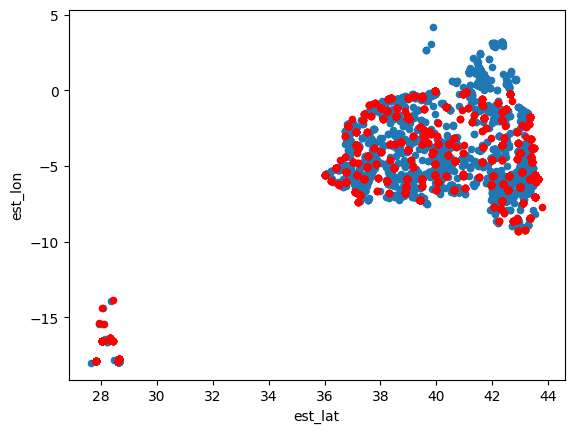

maximo error: 25km


In [101]:
ax = plt.gca()

df.plot(kind='scatter',x='inc_lat',y='inc_lon',ax=ax)
df.plot(kind='scatter',x='est_lat',y='est_lon', color='red', ax=ax)

plt.show()

print("maximo error: 25km")

In [63]:
from geopy.distance import geodesic
newport_ri = (df.iloc[0,0], df.iloc[0,1])
cleveland_oh = (df.iloc[0,2], df.iloc[0,3])
print(geodesic(newport_ri, cleveland_oh).miles * 1.60934)
print(df.iloc[0,0], df.iloc[0,1])
print(df.iloc[0,2], df.iloc[0,3])


25.327145047965757
37.0886 -5.8802
37.16444444444444 -5.6113888888888885


In [17]:
df = pd.read_csv("./distancias.csv")
cont = 0
max = 0
max2 = None
for _ in range(len(df)):
    if df.iloc[_,-3] <= 5:
        cont += 1
    if max < df.iloc[_,-3]:
        max = df.iloc[_,-3]
        max2 = df.iloc[_,:]
print(max)
print(f"menores de 6km: {cont}")
print(len(df))
max2


365.356496869653
menores de 6km: 798
4725


inc_lat            39.8703
inc_lon             4.2001
est_lat          39.957222
est_lon          -0.071944
distancia       365.356497
pos_estacion           144
fecha           2021-10-18
Name: 3114, dtype: object

In [66]:
import seaborn as sns

df = pd.read_csv('./folder/subfolder/Aemet2021-01-02.csv')
df.iloc[1:,:]

# hot map de la temperatura media de un dia





,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
1,Estaca de Bares,A Coruña,10.1 (15:30),4.9 (09:10),7.5,50 (19:20),30 (02:00),6.2,0.2,3,0.6,2.4,43.786111,-7.684722
2,A Coruña,A Coruña,10.4 (14:20),5.9 (05:40),8.1,24 (05:30),14 (16:20),6.6,1.8,2,0.6,2.2,43.365833,-8.421389
3,Cabo Vilan,A Coruña,9.9 (16:10),5.1 (09:10),7.5,55 (08:00),39 (07:50),7.2,0.6,1.9,2.5,2.2,43.160556,-9.210833
4,Fisterra,A Coruña,8.6 (16:50),5.1 (00:00),6.9,62 (07:20),34 (02:10),8.8,2.2,2.4,3.2,1,42.924722,-9.291389
5,Santiago de Compostela Aeropuerto,A Coruña,8.4 (16:10),1.2 (03:50),4.8,18 (15:40),10 (15:50),2.6,1.5,0.8,0,0.3,42.888056,-8.410556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Calatayud,Zaragoza,5.3 (15:10),-0.8 (08:10),2.3,48 (16:10),35 (15:40),0.2,0,0.2,0,0,41.331111,-1.645278
187,Zaragoza Aeropuerto,Zaragoza,6.4 (12:30),0.8 (04:10),3.6,69 (17:10),49 (13:50),0,0,0,0,0,41.660556,-1.004167
188,"Zaragoza, Valdespartera",Zaragoza,6.6 (14:40),1.3 (03:20),3.9,75 (23:59),37 (23:59),0,0,0,0,0,41.620833,-0.935000
189,Trujillo,Cáceres,7.2 (15:50),-1.7 (08:00),2.7,40 (16:00),22 (14:30),0,0,0,0,0,39.482500,-5.854167


In [67]:
# mapa de calor de la temperatura media de unas coordenadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./folder/subfolder/Aemet2021-01-02.csv')
df = df.iloc[1:,[1, -1,-2,4]]

# mapa de calor de la temperatura media de unas coordenadas
#lats = [coord for coord in df["latitude"]]
#longs = [coord for coord in df["longitude"]]
#sns.heatmap(df.iloc[:,4], xticklabels=longs, yticklabels=lats)
#plt.show()

df = df.dropna()
df = df.reset_index(drop=True)
df = df.astype({'Unnamed: 4': 'float64'})
df = df.astype({'latitude': 'float64'})
df = df.astype({'longitude': 'float64'})
df = df.sort_values(by=['latitude', 'longitude'])
df = df.reset_index(drop=True)
df = df.pivot(columns=["latitude", "longitude"],values="Unnamed: 4")
lats = [coord for coord in df.columns.levels[0]]
longs = [coord for coord in df.columns.levels[1]]
sns.heatmap(df, xticklabels=longs, yticklabels=lats)
plt.show()
df



KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'España' not found in columns."